## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  77.123234   456.907036  0.210456  1.380321  123.319737
1  69.163475   769.713576  0.376231  1.220991  297.637471
2  19.340755  1018.349371  0.410461  8.879524  418.419729
3  58.931213   925.825219  0.238760  7.023699  228.884270
4  12.407732   700.802809  0.599780  8.164631  420.601460


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0014708	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9894764	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9801867	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9697297	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9569678	total: 60.3ms	remaining: 12s
5:	learn: 0.9477449	total: 61ms	remaining: 10.1s
6:	learn: 0.9372013	total: 61.5ms	remaining: 8.72s
7:	learn: 0.9263873	total: 62ms	remaining: 7.69s
8:	learn: 0.9174455	total: 62.5ms	remaining: 6.89s
9:	learn: 0.9074582	total: 63.1ms	remaining: 6.24s
10:	learn: 0.8960217	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8825066	total: 64.2ms	remaining: 5.28s
12:	learn: 0.8713926	total: 64.8ms	remaining: 4.92s
13:	learn: 0.8592878	total: 65.6ms	remaining: 4.62s
14:	learn: 0.8490424	total: 66ms	remaining: 4.33s
15:	learn: 0.8416464	total: 66.6ms	remaining: 4.09s
16:	learn: 0.8304355	total: 67.2ms	remaining: 3.88s
17:	learn: 0.8224328	total: 67.6ms	remaining: 3.69s
18:	learn: 0.8151460	total: 68.1ms	remaining: 3.52s


114:	learn: 0.2921976	total: 111ms	remaining: 853ms
115:	learn: 0.2889708	total: 111ms	remaining: 849ms
116:	learn: 0.2859898	total: 112ms	remaining: 844ms
117:	learn: 0.2836972	total: 112ms	remaining: 839ms
118:	learn: 0.2810461	total: 113ms	remaining: 834ms
119:	learn: 0.2784157	total: 113ms	remaining: 830ms
120:	learn: 0.2755341	total: 114ms	remaining: 827ms
121:	learn: 0.2726526	total: 114ms	remaining: 824ms
122:	learn: 0.2702548	total: 115ms	remaining: 819ms
123:	learn: 0.2676590	total: 115ms	remaining: 815ms
124:	learn: 0.2644638	total: 116ms	remaining: 811ms
125:	learn: 0.2618879	total: 116ms	remaining: 807ms
126:	learn: 0.2597464	total: 117ms	remaining: 801ms
127:	learn: 0.2566660	total: 117ms	remaining: 797ms
128:	learn: 0.2542773	total: 117ms	remaining: 792ms
129:	learn: 0.2514579	total: 118ms	remaining: 787ms
130:	learn: 0.2492013	total: 118ms	remaining: 783ms
131:	learn: 0.2473827	total: 118ms	remaining: 779ms
132:	learn: 0.2449347	total: 119ms	remaining: 775ms
133:	learn: 

285:	learn: 0.0670277	total: 185ms	remaining: 461ms
286:	learn: 0.0666248	total: 185ms	remaining: 460ms
287:	learn: 0.0661841	total: 186ms	remaining: 460ms
288:	learn: 0.0658519	total: 186ms	remaining: 458ms
289:	learn: 0.0653612	total: 187ms	remaining: 457ms
290:	learn: 0.0649253	total: 187ms	remaining: 456ms
291:	learn: 0.0644787	total: 188ms	remaining: 455ms
292:	learn: 0.0640754	total: 188ms	remaining: 454ms
293:	learn: 0.0636551	total: 189ms	remaining: 453ms
294:	learn: 0.0632268	total: 189ms	remaining: 451ms
295:	learn: 0.0628030	total: 189ms	remaining: 451ms
296:	learn: 0.0625439	total: 190ms	remaining: 449ms
297:	learn: 0.0621801	total: 190ms	remaining: 448ms
298:	learn: 0.0616914	total: 191ms	remaining: 447ms
299:	learn: 0.0613363	total: 191ms	remaining: 446ms
300:	learn: 0.0609179	total: 192ms	remaining: 445ms
301:	learn: 0.0605738	total: 192ms	remaining: 444ms
302:	learn: 0.0601462	total: 192ms	remaining: 443ms
303:	learn: 0.0598027	total: 193ms	remaining: 442ms
304:	learn: 

481:	learn: 0.0301055	total: 291ms	remaining: 313ms
482:	learn: 0.0300203	total: 292ms	remaining: 313ms
483:	learn: 0.0299576	total: 293ms	remaining: 313ms
484:	learn: 0.0298752	total: 294ms	remaining: 312ms
485:	learn: 0.0298148	total: 294ms	remaining: 311ms
486:	learn: 0.0297322	total: 295ms	remaining: 310ms
487:	learn: 0.0296781	total: 295ms	remaining: 310ms
488:	learn: 0.0295696	total: 295ms	remaining: 309ms
489:	learn: 0.0294889	total: 296ms	remaining: 308ms
490:	learn: 0.0294291	total: 296ms	remaining: 307ms
491:	learn: 0.0293245	total: 297ms	remaining: 306ms
492:	learn: 0.0292810	total: 297ms	remaining: 306ms
493:	learn: 0.0291428	total: 298ms	remaining: 305ms
494:	learn: 0.0290767	total: 298ms	remaining: 304ms
495:	learn: 0.0290087	total: 298ms	remaining: 303ms
496:	learn: 0.0289587	total: 299ms	remaining: 302ms
497:	learn: 0.0289096	total: 299ms	remaining: 302ms
498:	learn: 0.0288093	total: 300ms	remaining: 301ms
499:	learn: 0.0286763	total: 300ms	remaining: 300ms
500:	learn: 

614:	learn: 0.0192053	total: 350ms	remaining: 219ms
615:	learn: 0.0191295	total: 351ms	remaining: 219ms
616:	learn: 0.0191167	total: 351ms	remaining: 218ms
617:	learn: 0.0191041	total: 351ms	remaining: 217ms
618:	learn: 0.0190915	total: 352ms	remaining: 217ms
619:	learn: 0.0190174	total: 352ms	remaining: 216ms
620:	learn: 0.0190050	total: 353ms	remaining: 215ms
621:	learn: 0.0189928	total: 353ms	remaining: 214ms
622:	learn: 0.0189637	total: 353ms	remaining: 214ms
623:	learn: 0.0188914	total: 354ms	remaining: 213ms
624:	learn: 0.0188795	total: 354ms	remaining: 212ms
625:	learn: 0.0187840	total: 354ms	remaining: 212ms
626:	learn: 0.0187134	total: 355ms	remaining: 211ms
627:	learn: 0.0187017	total: 355ms	remaining: 210ms
628:	learn: 0.0186902	total: 356ms	remaining: 210ms
629:	learn: 0.0186693	total: 356ms	remaining: 209ms
630:	learn: 0.0186435	total: 356ms	remaining: 208ms
631:	learn: 0.0185801	total: 357ms	remaining: 208ms
632:	learn: 0.0184813	total: 357ms	remaining: 207ms
633:	learn: 

869:	learn: 0.0087031	total: 458ms	remaining: 68.5ms
870:	learn: 0.0086772	total: 459ms	remaining: 68ms
871:	learn: 0.0086409	total: 460ms	remaining: 67.5ms
872:	learn: 0.0086252	total: 460ms	remaining: 66.9ms
873:	learn: 0.0085985	total: 460ms	remaining: 66.4ms
874:	learn: 0.0085830	total: 461ms	remaining: 65.8ms
875:	learn: 0.0085572	total: 461ms	remaining: 65.3ms
876:	learn: 0.0085387	total: 462ms	remaining: 64.8ms
877:	learn: 0.0085050	total: 463ms	remaining: 64.3ms
878:	learn: 0.0084703	total: 463ms	remaining: 63.7ms
879:	learn: 0.0084402	total: 464ms	remaining: 63.2ms
880:	learn: 0.0084055	total: 464ms	remaining: 62.7ms
881:	learn: 0.0083904	total: 465ms	remaining: 62.2ms
882:	learn: 0.0083647	total: 466ms	remaining: 61.7ms
883:	learn: 0.0083275	total: 466ms	remaining: 61.2ms
884:	learn: 0.0082913	total: 467ms	remaining: 60.6ms
885:	learn: 0.0082560	total: 467ms	remaining: 60.1ms
886:	learn: 0.0082239	total: 468ms	remaining: 59.6ms
887:	learn: 0.0081900	total: 469ms	remaining: 59

918:	learn: 0.0074601	total: 517ms	remaining: 45.6ms
919:	learn: 0.0074477	total: 519ms	remaining: 45.1ms
920:	learn: 0.0074174	total: 519ms	remaining: 44.5ms
921:	learn: 0.0074052	total: 520ms	remaining: 44ms
922:	learn: 0.0073764	total: 520ms	remaining: 43.4ms
923:	learn: 0.0073508	total: 521ms	remaining: 42.8ms
924:	learn: 0.0073388	total: 521ms	remaining: 42.2ms
925:	learn: 0.0073172	total: 522ms	remaining: 41.7ms
926:	learn: 0.0072877	total: 522ms	remaining: 41.1ms
927:	learn: 0.0072606	total: 522ms	remaining: 40.5ms
928:	learn: 0.0072490	total: 523ms	remaining: 40ms
929:	learn: 0.0072199	total: 523ms	remaining: 39.4ms
930:	learn: 0.0071913	total: 524ms	remaining: 38.8ms
931:	learn: 0.0071682	total: 524ms	remaining: 38.2ms
932:	learn: 0.0071419	total: 524ms	remaining: 37.7ms
933:	learn: 0.0071248	total: 525ms	remaining: 37.1ms
934:	learn: 0.0070989	total: 525ms	remaining: 36.5ms
935:	learn: 0.0070772	total: 526ms	remaining: 35.9ms
936:	learn: 0.0070566	total: 526ms	remaining: 35.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


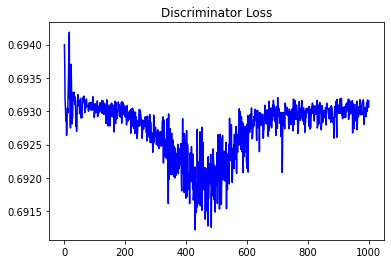

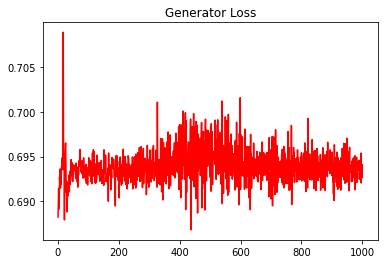

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.012955815064961839


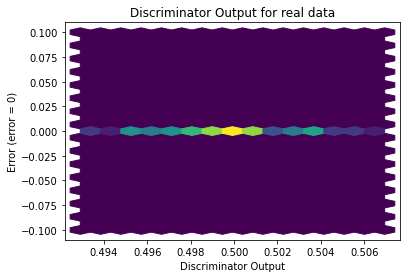

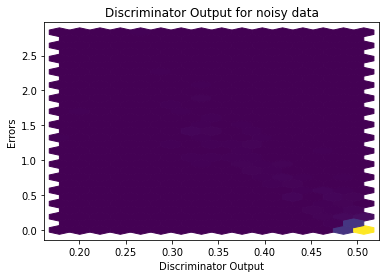

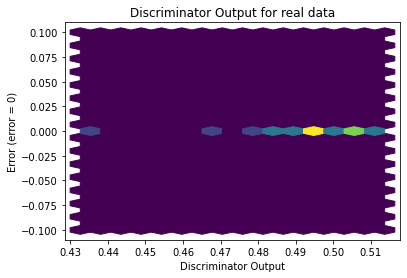

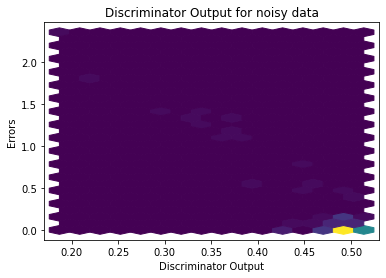

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2103]], requires_grad=True)
